# Chord Length Distributions

## Import Packages

In [1]:
import porespy as ps
import matplotlib.pyplot as plt

## Generate Artificial Image

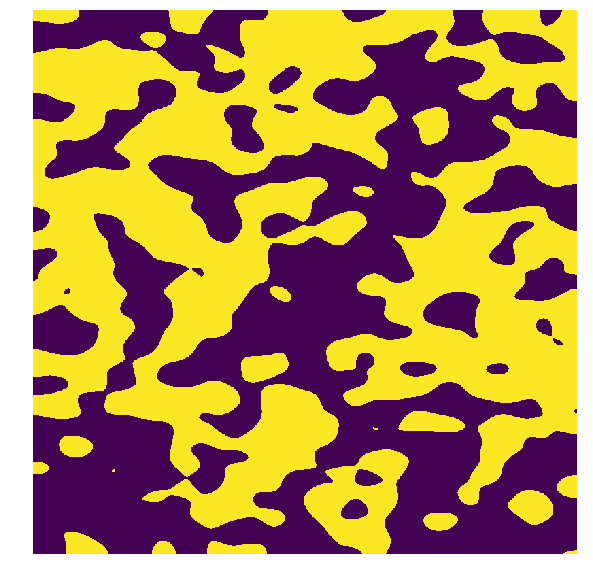

In [7]:
im = ps.generators.blobs(shape=[800,800],blobiness=(1.5,1), porosity=0.50)

fig, ax0 = plt.subplots(figsize=(10,10))
im0 = ax0.imshow(im)
ax0.axis('off')
plt.show()

## Apply Chords Using Filter and Analyze

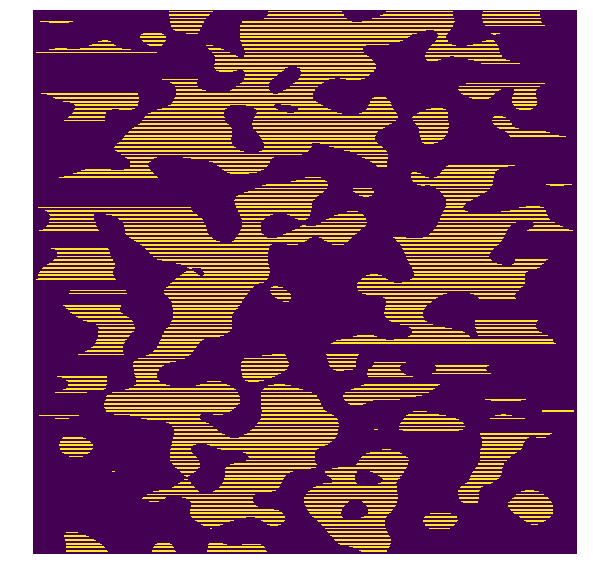

In [8]:
chords_x = ps.filters.apply_chords(im, axis=0, spacing=1, trim_edges=True)
chords_y = ps.filters.apply_chords(im, axis=1, spacing=1, trim_edges=True)

fig, ax0 = plt.subplots(figsize=(10,10))
im0 = ax0.imshow(chords_y)
ax0.axis('off')
plt.show()

Note in this image that chords connected to the edge have been removed.  These chords are unnaturally shortened so could skew the distribution.  These chords can be preserved by setting the ``trim_edges`` argument to ``False`` in the call to ``apply_chords``.   Also, the spacing between the yellow chords is adjustable.  These chords must have a least 1 blank (purple) voxel between them, but this value can be increased using the ``spacing`` argument. 

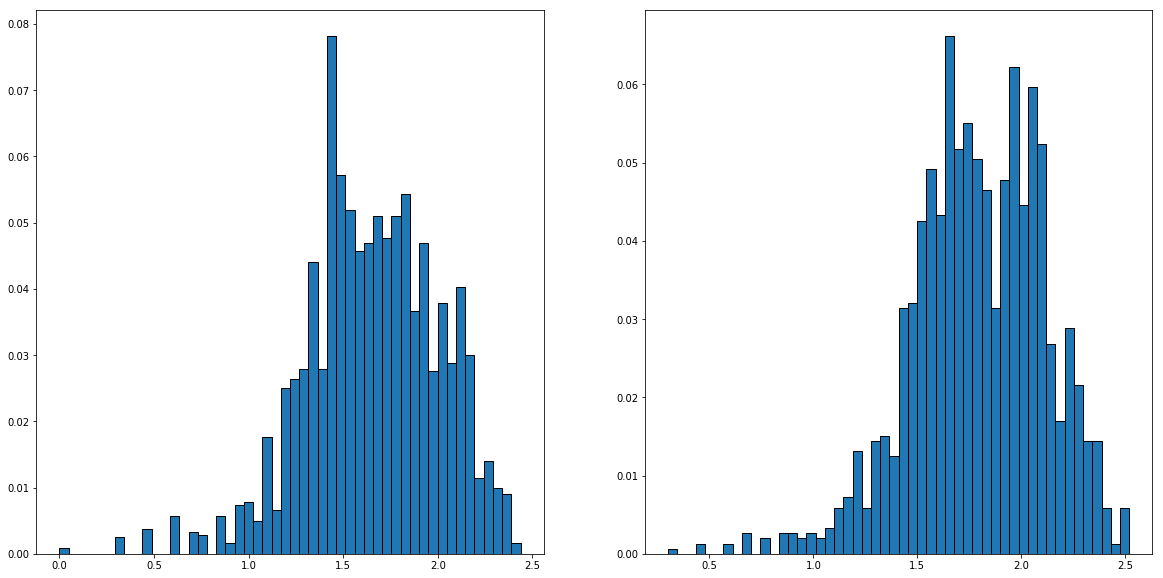

In [9]:
cld_x = ps.metrics.chord_length_distribution(chords_x,bins=50,log=True)
cld_y = ps.metrics.chord_length_distribution(chords_y,bins=50,log=True)

fig, (ax0,ax1) = plt.subplots(ncols=2,nrows=1,figsize=(20,10))
ax0.bar(cld_x.bin_centers,cld_x.relfreq,width=cld_x.bin_widths,edgecolor='k')
ax1.bar(cld_y.bin_centers,cld_y.relfreq,width=cld_y.bin_widths,edgecolor='k')
plt.show()

The results are noisy since the number of chords in a 2D image is not large enough to provide a good statistical distribution. A more traditional cumaltive density function on a normal scale is also available:

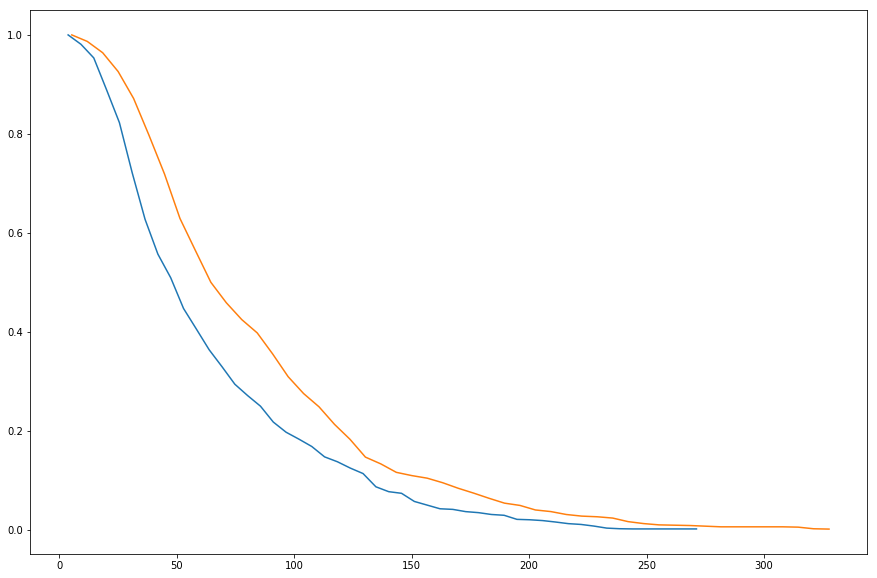

In [10]:
cld_x = ps.metrics.chord_length_distribution(chords_x,bins=50)
cld_y = ps.metrics.chord_length_distribution(chords_y,bins=50)

fig, ax0 = plt.subplots(figsize=(15,10))
ax0.plot(cld_x.bin_centers,cld_x.cdf)
ax0.plot(cld_y.bin_centers,cld_y.cdf)
plt.show()